<h1>Shapiro-Wilk Test</h1>

<h3><font color='grey'>P-values 5%+ are likely normally distributed</font></h3>

<br>

In [105]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# style
from ipynb.fs.full.i_Style_Sheet import *
plt.style.use(style_use)
plt.rcParams.update(style_params)

# import ColorSpace function
from ipynb.fs.full.ii_ColorSpace import colorspace
hex_base = '89F4EC'
palettes = colorspace(hex_base)
pal = palettes['Friend palette']

# base data
file_path = r'Data\gss_general_social_survey.hdf5'
data = pd.read_hdf(file_path)
data = data['educ'].dropna()
mu, sigma, s = sample.mean(), sample.std(), 1000

# sampling
np.random.seed(1)
data = np.random.normal(mu, sigma, s)

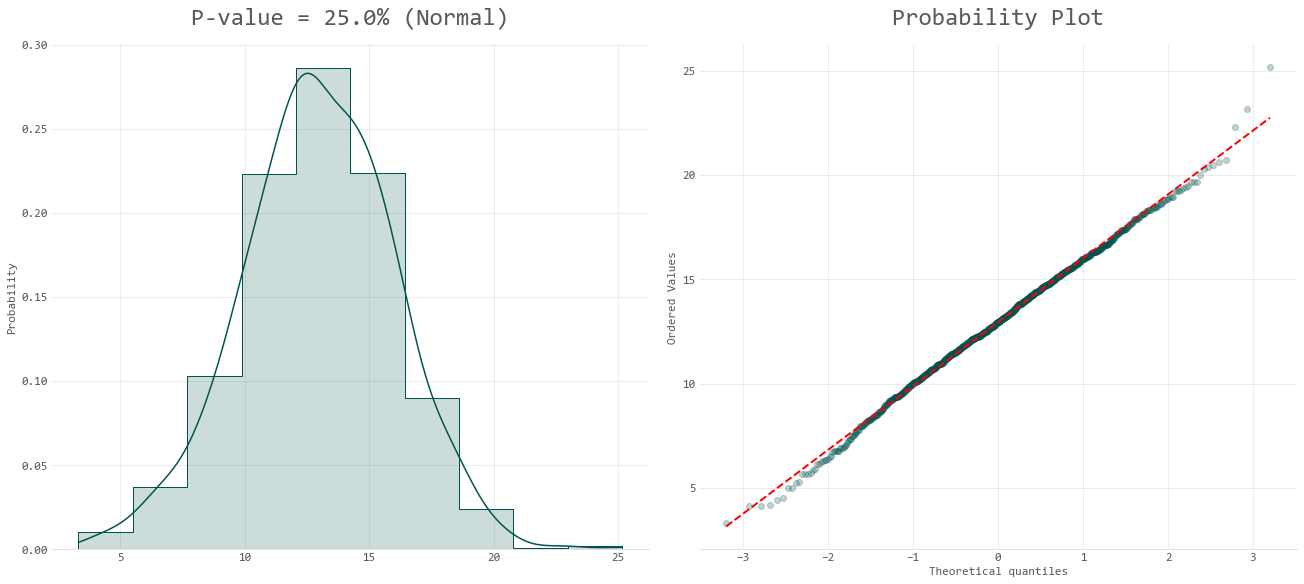

In [117]:
from scipy.stats import shapiro, probplot

stat, p = shapiro(data)
a = 0.05
if p>a:
    nml = 'Normal'
else:
    nml = 'Not Normal'


fig, [ax_1, ax_2] = plt.subplots(1, 2, figsize=(18,8), constrained_layout=True)
sns.histplot(ax=ax_1, data=data, stat='probability', element='step', kde=True, bins=10, alpha=0.2, color=pal[1])
probplot(data, dist='norm', plot=ax_2)
#t1 = ax_2.get_lines()[0]
#t1.set_color(pal[0])
ax_2.get_lines()[1].set_linewidth(2)
ax_2.get_lines()[1].set_linestyle('--')
ax_2.get_lines()[0].set_color(pal[1])
ax_2.get_lines()[0].set_alpha(0.25)
ax_1.set_title(f'P-value = {round(p*100, 1)}% ({nml})')


plt.show()